In [1]:
!pwd

/Users/maliksalam/Google Drive/Data Science/Metis/prework/dsp


In [2]:
!python --version

Python 3.6.3 :: Anaconda, Inc.


In [3]:
print("Hello World")

Hello World


# THIS IS A TITLE

     Weekday  Count
0     Friday     13
2   Saturday     10
3     Sunday      8
5    Tuesday      7
1     Monday      6
4   Thursday      6
6  Wednesday      6


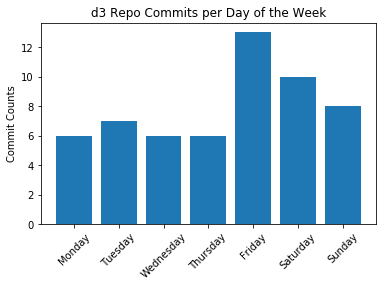

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
import pandas as pd
# Open the .txt file and flaten the json into a DataFrame
commits_json = open('resources/d3_commits.txt')
commits_py = json.loads(commits_json.read())
commits_df = pd.io.json.json_normalize(commits_py)
commits_json.close()

# Convert the commit.author.date column to datetime objects with time stripped out
commits_df['Clean Date'] = commits_df['commit.author.date'].map(lambda x: x[:-10])
commits_df['Clean Date'] = pd.to_datetime(commits_df['Clean Date'])

# Add Weekday and Weekday # column
commits_df['Weekday'] = commits_df['Clean Date'].dt.weekday_name
commits_df['Weekday #'] = commits_df['Clean Date'].dt.weekday

# Group the DataFrame using the weekday column, sorting on Clean Date counts
commits_grouped = commits_df.groupby(['Weekday'])['Clean Date'].count().reset_index(name = 'Count')
commits_grouped = commits_grouped.sort_values('Count', ascending = False)

print(commits_grouped)
# In the last year, most commits were done on Fridays (closely followed by Saturday and Sunday)


# Create a commits count sorted by day of the weel in order
commits_sorted = commits_df.groupby(['Weekday #'])['Clean Date'].count().reset_index(name = 'Count')

# Graph number of commits per day of the week.
plt.figure(1)
plt.bar(commits_sorted['Weekday #'], commits_sorted['Count'])
x_axis = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(commits_sorted['Weekday #'], x_axis, rotation = 45)
plt.ylabel('Commit Counts')
plt.title('d3 Repo Commits per Day of the Week')
plt.subplots_adjust(bottom = 0.18)
plt.show()


    In Work Hours  Count
0          False     46
1           True     10


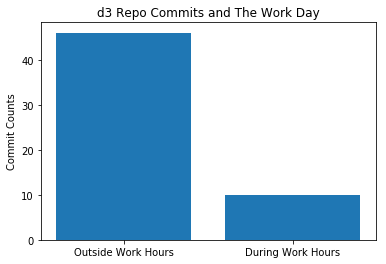

In [7]:
# This looks like this could be a side-project that is mainly worked during the weekend
# Following up on that, let's see if people mainly commit outside of regular work hours

# Create a new Hour column
commits_df['Hour'] = pd.to_datetime(commits_df['commit.author.date']).dt.hour

# Evaluate whether Hour falls between 9 and 17 (9 am and 5 pm) on a week day
commits_df['In Work Hours'] = (commits_df['Hour'].isin(range(9,17))) & (commits_df['Weekday #'] < 6)

# Group the DataFrame using whether the commit was done during work hours
commits_hours = commits_df.groupby(['In Work Hours'])['Hour'].count().reset_index(name = 'Count')

print("\n", commits_hours)
# Indeed, it looks like this repo is mainly maintaned outside of regular work hours

# Graph the output
plt.figure(2)
plt.bar(commits_hours['In Work Hours'], commits_hours['Count'])
x_axis = ['Outside Work Hours', 'During Work Hours']
plt.xticks(commits_hours['In Work Hours'], x_axis,)
plt.ylabel('Commit Counts')
plt.title('d3 Repo Commits and The Work Day')
plt.show()

*I wish I knew how to use jupyter before the application challenges. Would have been helpful.*